'''
Goal: predict the likeihood a patient having stroke given some health data
Model: developed through Logistic Regression and AIC model selection (please refer to the R code)

The final model for prediction: 
Stroke ~ age + average glucose level + hypertension + heart disease

While adjusting cutoff values, I focus on decreasing Type2 error(False Negative Cases). 
Because I would like the model to be able to catch as many patients with high probability of having stroke as possible

'''



# Content
1. Data Preprocessing
2. Model Building
Logistic Regression
GridSearch CV
3. Model Tuning by changing cutoff values

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, accuracy_score, precision_score, recall_score



In [2]:
data = pd.read_csv('/Users/mercuryliu/Downloads/healthcare-dataset-stroke-data (1).csv', engine='python')
df = data.drop(columns=['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'bmi', 'smoking_status'])


In [3]:
df = df.dropna()
X = df.drop(columns = ['stroke'])
y = df['stroke']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
X_train.shape

(3423, 4)

In [6]:
y_train.shape

(3423,)

In [7]:
X_names = X_train.columns.tolist()

## Model Building

In [8]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty_1 = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid_1 = dict(solver=solvers,penalty=penalty_1,C=c_values)
cv_1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_1 = GridSearchCV(estimator=model, param_grid=grid_1, n_jobs=-1, cv=cv_1, scoring='accuracy',error_score=0)
grid_result_1 = grid_search_1.fit(X_train, y_train)

In [9]:
print("Best: %f using %s" % (grid_result_1.best_score_, grid_result_1.best_params_))
means_1 = grid_result_1.cv_results_['mean_test_score']
stds_1 = grid_result_1.cv_results_['std_test_score']
params_1 = grid_result_1.cv_results_['params']


Best: 0.955304 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [10]:
lr_1 = LogisticRegression(penalty='l1', tol=1e-6, C=100, solver='liblinear', max_iter=1000)
lr_1.fit(X_train, y_train)


LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear',
                   tol=1e-06)

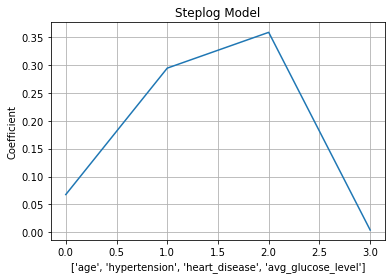

In [11]:
plt.plot(lr_1.coef_.flatten())
plt.title('Steplog Model')
plt.ylabel('Coefficient')
plt.xlabel(X_names)
plt.grid()


## Model Tuning

In [12]:
lr_predictions = lr_1.predict(X_test)
print(precision_score(y_test, lr_predictions))

0.0


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#check the precision and recall score for different cutoff values
#the plot shows that 0.5 is not a good cutoff value
y_pred_prob = lr_1.predict_proba(X_test)[:,1]

cutoff = np.arange(0,1, 0.1)
precision = []
recall = []
f1 = []
for k in range(len(cutoff)):
    pred_labels = []
    for i in range(len(y_pred_prob)):
        if y_pred_prob[i] <= cutoff[k]:
            pred_labels.append(0)
        else:
            pred_labels.append(1)
    precision.append(precision_score(y_test, pred_labels))
    recall.append(recall_score(y_test, pred_labels))
    f1.append(f1_score(y_test, pred_labels))


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


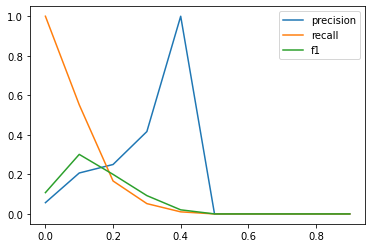

In [14]:
plt.plot(cutoff, precision, label='precision')
plt.plot(cutoff, recall, label='recall' )
plt.plot(cutoff, f1, label='f1')
plt.legend()
plt.show()

In [15]:
y_pred_prob = lr_1.predict_proba(X_test)[:,1]

In [16]:
#loop through all the values betwee[0, 0.4], show Type1 error, Type 2 error, and model accuracy
cutoff2 = np.arange(0,0.4, 0.02)
T1 = []
T2 = []
accu = []
for k in range(len(cutoff2)):
    pred_labels = []
    for i in range(len(y_pred_prob)):
        if y_pred_prob[i] <= cutoff2[k]:
            pred_labels.append(0)
        else:
            pred_labels.append(1)
    cm = confusion_matrix(y_test, pred_labels)
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    sensitivity = cm[0,0]/(cm[0,0] + cm[0,1])
    T1.append(1 - specificity)
    T2.append(1 - sensitivity)
    accu.append(accuracy_score(y_test, pred_labels))


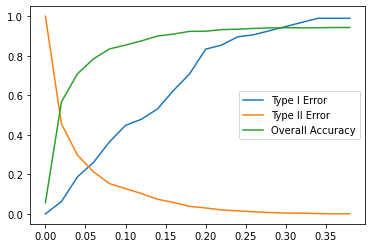

In [17]:
plt.plot(cutoff2, T1, label='Type I Error')
plt.plot(cutoff2, T2, label='Type II Error' )
plt.plot(cutoff2, accu, label='Overall Accuracy' )

plt.legend()
plt.show()

In [18]:
#to find a precise value of, zoom in the plot

In [19]:
cutoff3 = np.arange(0.1,0.4, 0.01)
T1 = []
T2 = []
accu = []
for k in range(len(cutoff3)):
    pred_labels = []
    for i in range(len(y_pred_prob)):
        if y_pred_prob[i] <= cutoff3[k]:
            pred_labels.append(0)
        else:
            pred_labels.append(1)
    cm = confusion_matrix(y_test, pred_labels)
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    sensitivity = cm[0,0]/(cm[0,0] + cm[0,1])
    T1.append(1 - specificity)
    T2.append(1 - sensitivity)
    accu.append(accuracy_score(y_test, pred_labels))


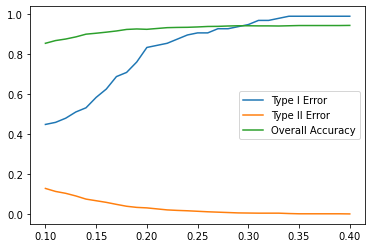

In [20]:
#overall accuracy is betweeo 0.8 - 1
#If we want low Type II error, choose cutoff values between 0.3 - 0.4
plt.plot(cutoff3, T1, label='Type I Error')
plt.plot(cutoff3, T2, label='Type II Error' )
plt.plot(cutoff3, accu, label='Overall Accuracy' )

plt.legend()
plt.show()